In [1]:
import ROOT

In [2]:
root_file = ROOT.TFile("/Users/thiagorangel/UERJ/RPC/build/output.root", "read")

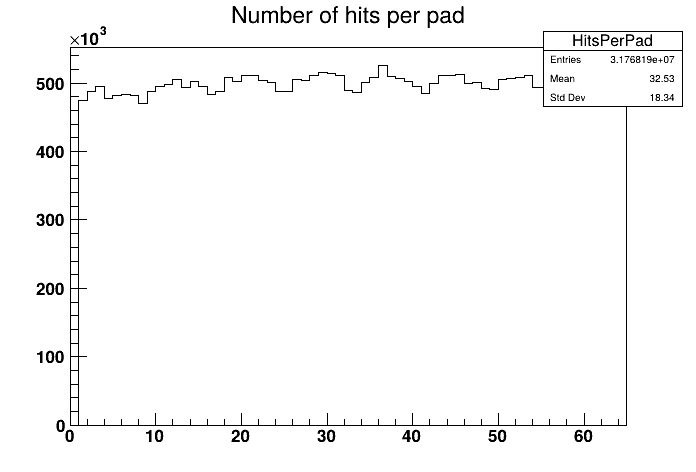

In [4]:
c1 = ROOT.TCanvas()
hist = root_file.Get("HitsPerPad")
hist.Draw("hist")
c1.Draw()

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


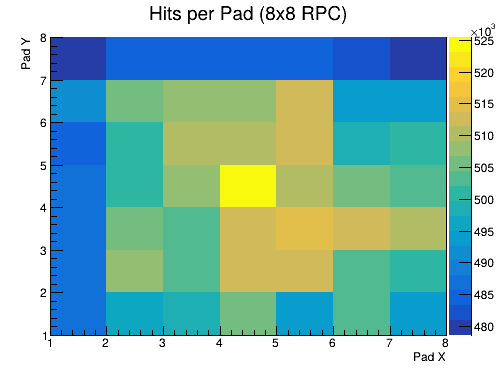

In [5]:
import ROOT

# Assuming you already have root_file and c1 defined
root_file = ROOT.TFile("/Users/thiagorangel/UERJ/RPC/build/output.root", "read")
c1 = ROOT.TCanvas("c1", "Hits per Pad 2D Map (Excluding 0,0)", 500, 400)

# Get the 1D histogram
hist_1d = root_file.Get("HitsPerPad")

if hist_1d:
    # Create a new 2D histogram (8x8 pads)
    # Using 1 to 9 for axes to conceptually represent pads 1 to 8, making it easier to exclude "0"
    hist_2d = ROOT.TH2D("HitsPerPad2D", "Hits per Pad (8x8 RPC);Pad X;Pad Y", 8, 0, 8, 8, 0, 8)
    hist_2d.SetStats(0)

    # Fill the 2D histogram from the 1D histogram
    for i in range(1, hist_1d.GetNbinsX() + 1):
        # Calculate the (x, y) coordinates for the 8x8 grid
        # Assuming bin 1 in 1D is (0,0), bin 2 is (1,0), etc.
        x_coord = (i - 1) % 8
        y_coord = (i - 1) // 8

        bin_content = hist_1d.GetBinContent(i)

        # Fill the corresponding bin in the 2D histogram
        # We fill all pads here, then we will control the drawing range
        hist_2d.SetBinContent(hist_2d.FindBin(x_coord + 0.5, y_coord + 0.5), bin_content)

    # --- Adjust the drawing range to exclude the (0,0) area ---
    # Set the range for the X-axis, starting from 1 instead of 0
    hist_2d.GetXaxis().SetRangeUser(1, 8)
    # Set the range for the Y-axis, starting from 1 instead of 0
    hist_2d.GetYaxis().SetRangeUser(1, 8)
    # This effectively makes the plot show pads (1,1) through (8,8)

    # Draw the 2D histogram as a heatmap
    hist_2d.Draw("COLZ")

    # Update the canvas to show the changes
    c1.Update()
    c1.Draw()

else:
    print("Error: 1D histogram 'HitsPerPad' not found. Please check the name in your ROOT file.")

Warning in <TCanvas::Constructor>: Deleting canvas with same name: c1


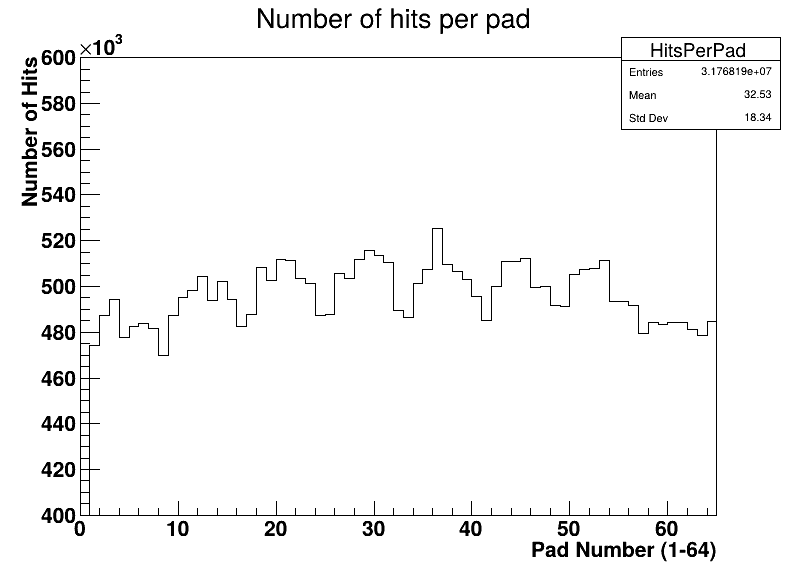

In [6]:
import ROOT

# Abre o arquivo ROOT
root_file = ROOT.TFile("/Users/thiagorangel/UERJ/RPC/build/output.root", "read")

# Cria um TCanvas para desenhar o histograma
c1 = ROOT.TCanvas("c1", "Hits per Pad 1D", 800, 600) # Dei um nome e tamanho para o canvas

# Pega o histograma 1D chamado "HitsPerPad" do arquivo
hist = root_file.Get("HitsPerPad")

if hist:
    # Desenha o histograma 1D
    # A opção "hist" é boa para visualização de barras
    hist.Draw("hist")

    # Define o título dos eixos para maior clareza
    hist.GetXaxis().SetTitle("Pad Number (1-64)")
    hist.GetYaxis().SetTitle("Number of Hits")
    hist.GetYaxis().SetRangeUser(400*10**3, 600*10**3)

    # Atualiza o canvas para exibir o histograma
    c1.Update()
    c1.Draw("hist")

    # Para manter a janela aberta se estiver rodando como um script Python standalone:
    # input("Pressione Enter para sair...")

else:
    print("Erro: Histograma 'HitsPerPad' não encontrado no arquivo ROOT. Verifique o nome.")